In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM



from statsmodels.tsa.api import ExponentialSmoothing





In [2]:
data = pd.read_csv("jena_climate_2009_2016.csv")
print(data.head())

             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [3]:
# Выбор столбца с целевой переменной и создание признаков
target_col = 'T (degC)'
feature_cols = ['p (mbar)', 'rho (g/m**3)']
X = data[feature_cols]
y = data[target_col]

In [4]:
# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Линейная регрессия

In [5]:
# Обучение регрессионной модели
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

In [7]:
# Оценка точности модели
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 0.28


C:\Users\Сорокин\AppData\Local\Temp\ipykernel_6796\1681118608.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(100), y_test[:100], label='true')


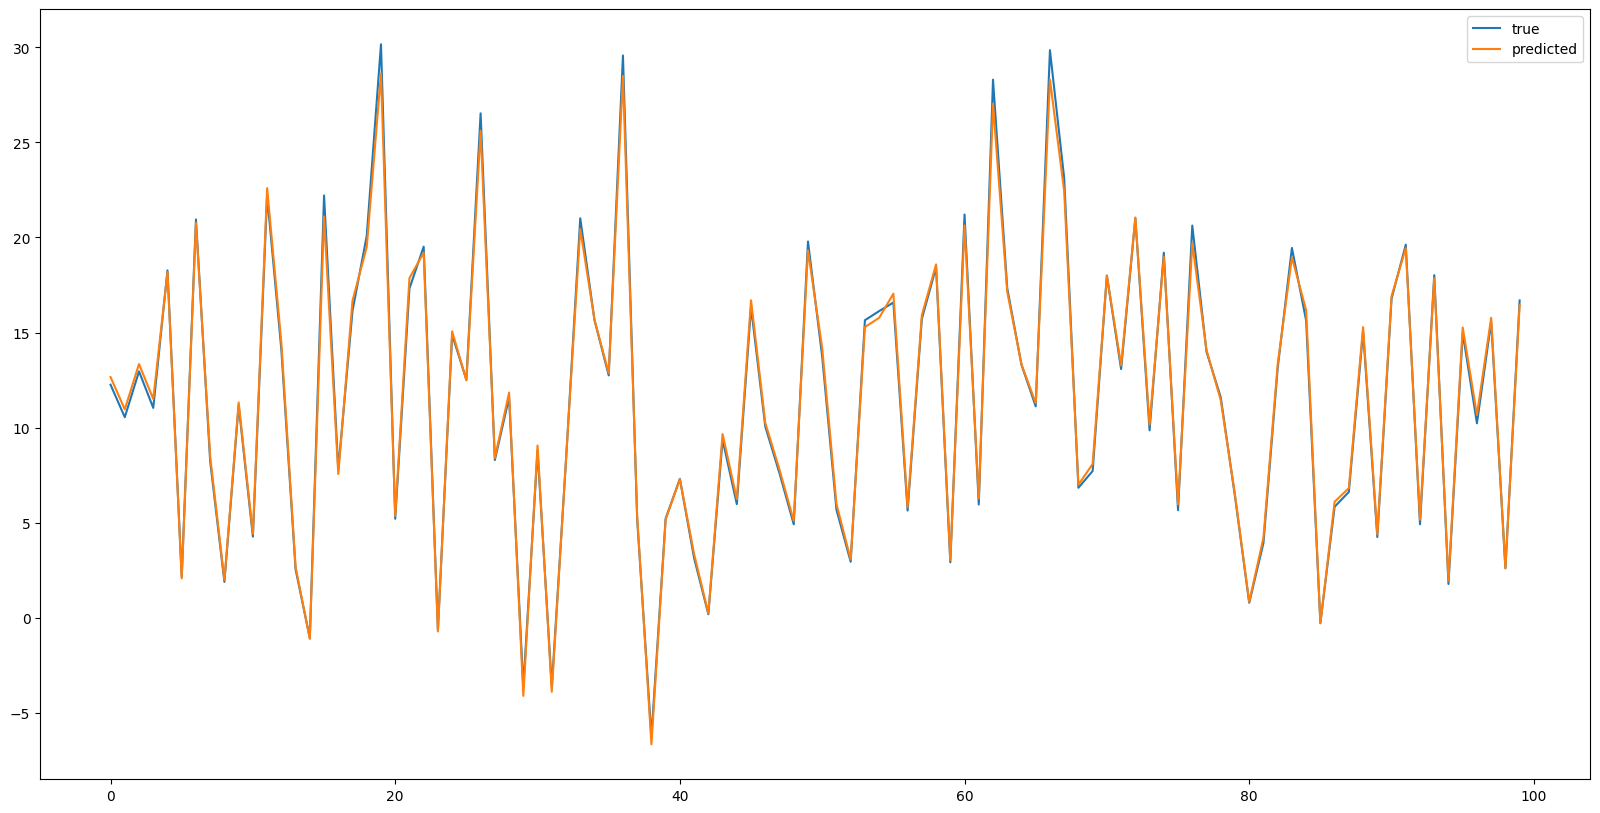

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(range(100), y_test[:100], label='true')
plt.plot(range(100), y_pred[:100], label='predicted')
plt.legend()
plt.show()

##### Экспоненциальное сглаживание

In [56]:
data = pd.read_csv("jena_climate_2009_2016.csv")

In [57]:
# выберем столбец 'T (degC)' для прогнозирования
y = data['T (degC)']

# дополнительная обработка данных
y = y.replace(-9999, np.nan).fillna(method='ffill')

# разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(np.arange(len(y)), y, test_size=0.2, random_state=42)

In [58]:
# # создание модели и обучение на обучающей выборке
# model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()


# # создание прогноза для тестовой выборки
# # test_df = pd.DataFrame(index=X_test, columns=X_test.columns)
# # y_pred = model.predict(start=test_df.index[0], end=test_df.index[-1])


# test_data = data[-84111:]
# y_pred = model.predict(start=test_data.index[0], end=test_data.index[-1])


# # вычисление MAE
# mae = mean_absolute_error(y_test, y_pred)
# print("MAE: {:.2f}".format(mae))


# создание модели и обучение на обучающей выборке
model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12).fit()

# создание прогноза для тестовой выборки
# test_df = pd.DataFrame(index=X_test, columns=X_test.columns)
# y_pred = model.predict(start=test_df.index[0], end=test_df.index[-1])


test_data = data[-1746:]
y_pred = model.predict(start=test_data.index[0], end=test_data.index[-1])


# вычисление MAE
# mae = mean_absolute_error(y_test, y_pred)
# print("MAE: {:.2f}".format(mae))

C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [55]:
# # # разбиение на тестовую и обучающую выборку
# # train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# # print (y_train)

# # # обучение модели
# # model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=12)
# # model_fit = model.fit()

# # # прогнозирование

# # test_data = data[-84111:]
# # print (test_data)

# # y_pred = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# # Test_model = ExponentialSmoothing(y_test, trend='add', seasonal='add', seasonal_periods=12)

# # print (y_test, y_pred)

# # # вычисление MAE
# # mae = mean_absolute_error(y_test, y_pred)
# # print("MAE: {:.2f}".format(mae))








# # разбиение на тестовую и обучающую выборку
# # train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
# train_data, test_data = train_test_split(np.arange(len(y)), test_size=0.2, random_state=42)

# # обучение модели
# model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
# model_fit = model.fit()

# # прогнозирование

# # print (test_data)

# y_pred = model_fit.predict(start=test_data[0], end=test_data[-1])

# Test_model = ExponentialSmoothing(test_data, trend='add', seasonal='add', seasonal_periods=12)

# print (y_test, y_pred)

# # вычисление MAE
# mae = mean_absolute_error(data[-84111:], y_pred[:84111])
# print("MAE: {:.2f}".format(mae))


In [60]:
# разбиение на тестовую и обучающую выборку
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# обучение модели
model = ExponentialSmoothing(train_data['T (degC)'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# прогнозирование
y_pred = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# вычисление MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE: {:.2f}".format(mae))

C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Сорокин\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ValueError: Found input variables with inconsistent numbers of samples: [84111, 237511]

C:\Users\Сорокин\AppData\Local\Temp\ipykernel_6796\2878909094.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(100), test_data['T (degC)'][:100], label='true')
C:\Users\Сорокин\AppData\Local\Temp\ipykernel_6796\2878909094.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(range(100), y_pred[:100], label='predicted')


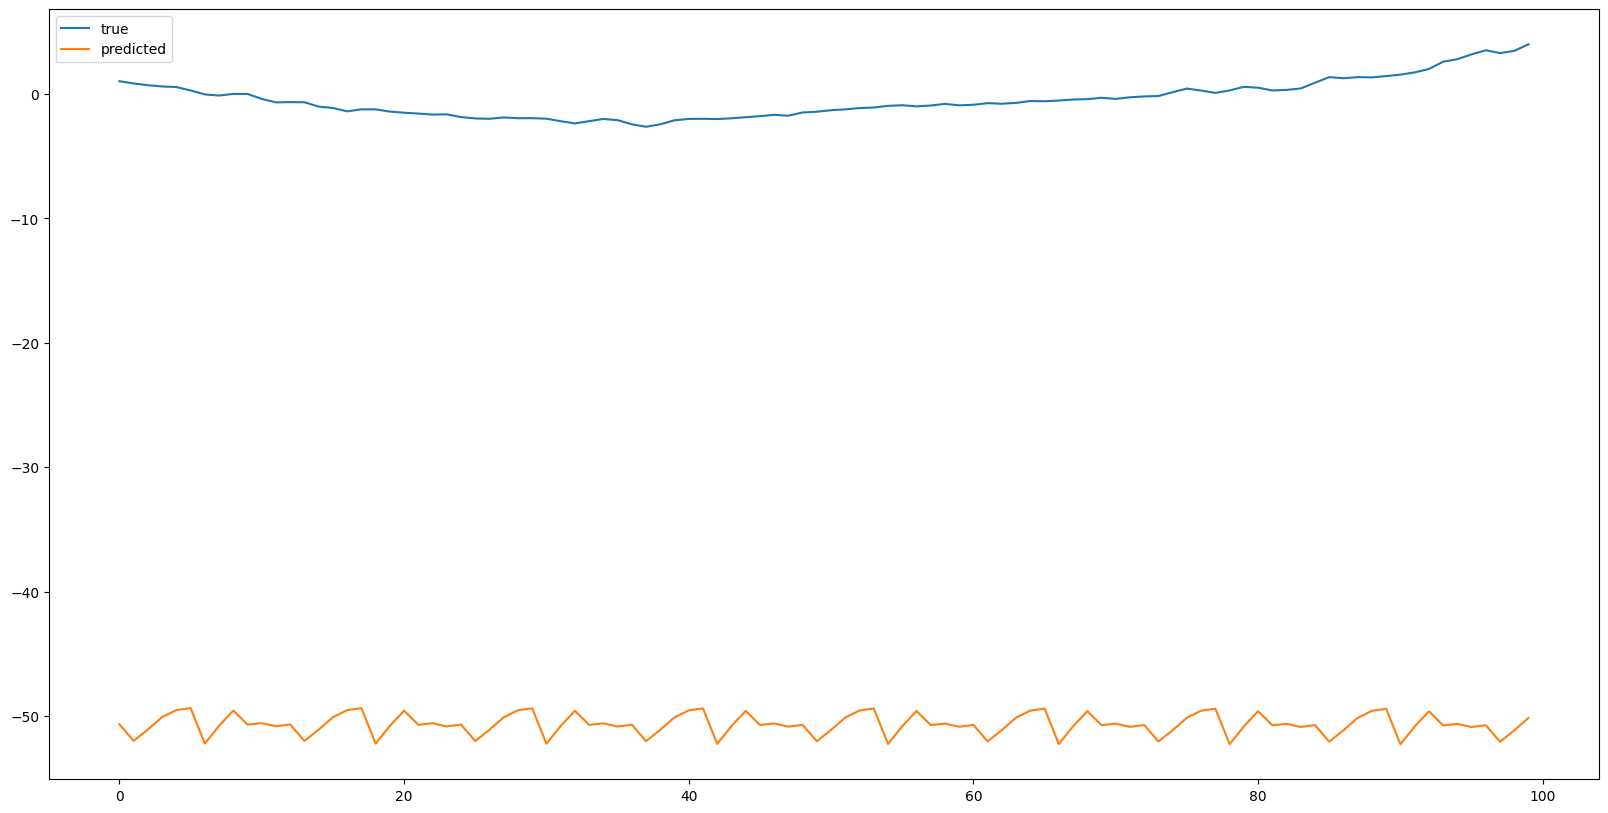

In [59]:
# визуализация результатов
plt.figure(figsize=(20, 10))
plt.plot(range(100), test_data['T (degC)'][:100], label='true')
plt.plot(range(100), y_pred[:100], label='predicted')
plt.legend()
plt.show()

In [53]:
y_pred.info()

<class 'pandas.core.series.Series'>
RangeIndex: 84111 entries, 336440 to 420550
Series name: None
Non-Null Count  Dtype  
--------------  -----  
84111 non-null  float64
dtypes: float64(1)
memory usage: 657.2 KB


In [54]:
mae = mean_absolute_error(test_data['T (degC)'][:84111], y_pred[:84111])
print(f'MAE: {mae:.2f}')

MAE: 32.55


C:\Users\Сорокин\AppData\Local\Temp\ipykernel_6796\2495736368.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  mae = mean_absolute_error(test_data['T (degC)'][:84111], y_pred[:84111])


##### Простая нейронная модель LSTM

In [16]:
# загрузить датасет
df = pd.read_csv('jena_climate_2009_2016.csv')

# выделить столбец с температурой
data = df[['T (degC)']].values

# преобразовать данные к диапазону от 0 до 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)


In [17]:
# создать функцию для создания датасета из временных последовательностей
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# создать датасет с помощью функции create_dataset
look_back = 10
X, y = create_dataset(data, look_back)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# создать модель нейронной сети LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
# обучить модель
model.fit(X_train, y_train, epochs=4, batch_size=32)

Epoch 1/4
10514/10514 [==============================] - 42s 4ms/step - loss: 2.6079e-04
Epoch 2/4
10514/10514 [==============================] - 41s 4ms/step - loss: 1.5659e-05
Epoch 3/4
10514/10514 [==============================] - 42s 4ms/step - loss: 1.3418e-05
Epoch 4/4
10514/10514 [==============================] - 39s 4ms/step - loss: 1.2949e-05


2629/2629 [==============================] - 7s 3ms/step


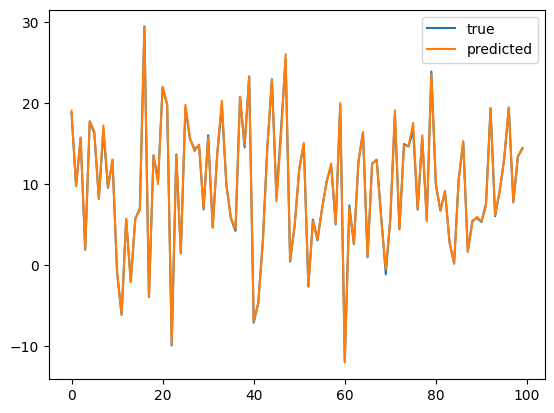

In [21]:
# сделать предсказания на тестовой выборке
y_pred = model.predict(X_test)

# преобразовать предсказания обратно к исходному масштабу
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

# визуализировать предсказания
plt.plot(y_test.reshape(-1)[:100], label='true')
plt.plot(y_pred.reshape(-1)[:100], label='predicted')
plt.legend()
plt.show()

In [22]:
X_test = scaler.inverse_transform(X_test)
y_test_reshaped = np.reshape(y_test, (-1, 1))
y_pred_reshaped = np.reshape(y_pred, (-1, 1))
mae = mean_absolute_error(y_test_reshaped, y_pred_reshaped)
print('MAE:', mae)


# print("MAE: ", mae)

MAE: 0.14633448392918721
